In [1]:
import numpy as np

In [2]:
res=np.load('imdb.npz')
#将训练数据和测试数据加载进来
x_train=res['x_train']
y_train=res['y_train']
x_test=res['x_test']
y_test=res['y_test']
#将数据分好

237.71364


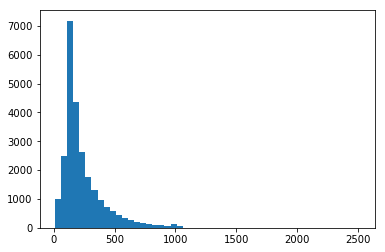

In [3]:
avg_len = list(map(len, x_train))
print(np.mean(avg_len))


import matplotlib.pyplot as plt
plt.hist(avg_len, bins = range(min(avg_len), max(avg_len) + 50, 50))
plt.show()
#做一个统计，看一下一个评论都有几个词，一个评论平均有237个词语

In [12]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [13]:
maxword = 400
x_train_pad = sequence.pad_sequences(x_train, maxlen = maxword)
x_test_pad = sequence.pad_sequences(x_test, maxlen = maxword)
vocab_size = np.max([np.max(x_train_pad[i]) for i in range(x_train_pad.shape[0])]) + 1

#由于我们的评论所包含的单词有多有少，所以需要统一一下单词个数，这里确定统一的单词个数为400个，少了补，多了删除。

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))

In [15]:
model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation= 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv1D(filters = 128, kernel_size = 3, padding = 'same',activation= 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.25))

In [16]:

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics =['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           5669440   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 400, 64)           12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 128)          24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 128)          0         
__________

In [20]:
model.fit(x_train_pad, y_train, validation_data = (x_test_pad, y_test), epochs = 20, batch_size = 100)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 183s - loss: 0.1421 - acc: 0.9484 - val_loss: 0.3412 - val_acc: 0.8710
Epoch 2/20
25000/25000 [==============================] - 206s - loss: 0.0966 - acc: 0.9669 - val_loss: 0.4647 - val_acc: 0.8401
Epoch 3/20
25000/25000 [==============================] - 228s - loss: 0.0671 - acc: 0.9778 - val_loss: 0.3796 - val_acc: 0.8732
Epoch 4/20
25000/25000 [==============================] - 224s - loss: 0.0470 - acc: 0.9841 - val_loss: 0.5983 - val_acc: 0.8397
Epoch 5/20
25000/25000 [==============================] - 209s - loss: 0.0313 - acc: 0.9894 - val_loss: 0.5317 - val_acc: 0.8675
Epoch 6/20
25000/25000 [==============================] - 213s - loss: 0.0179 - acc: 0.9948 - val_loss: 0.6034 - val_acc: 0.8643
Epoch 7/20
25000/25000 [==============================] - 188s - loss: 0.0127 - acc: 0.9962 - val_loss: 0.8952 - val_acc: 0.8501
Epoch 8/20
25000/25000 [=======================

In [23]:
scores = model.evaluate(x_test_pad, y_test, verbose = 1)
print(scores)

24992/25000 [============================>.] - ETA: 0s[1.7966678818082193, 0.85448000000000002]


In [24]:
scores

[1.7966678818082193, 0.85448000000000002]